In [29]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict, Literal 
from langchain_google_genai import ChatGoogleGenerativeAI 
from dotenv import load_dotenv 
import os 

In [30]:
class QuadraticInput(TypedDict):
    a: float
    b: float
    c: float
    equation : str
    d: float 
    result : str

def show_eqn(state: QuadraticInput) -> str:
    a, b, c = state['a'], state['b'], state['c']
    equation = f"The quadratic equation is: {a}x^2 + {b}x + {c} = 0"
    return {"equation": equation}

def calc_disc(state: QuadraticInput) -> float:
    a, b, c = state['a'], state['b'], state['c']
    d = b**2 - 4*a*c
    return {"d": d}

def real_roots(state: QuadraticInput) -> str:
    a, b, d = state['a'], state['b'], state['d']
    root1 = (-b + d**0.5) / (2*a)
    root2 = (-b - d**0.5) / (2*a)
    result = f"The roots are real and different: {root1} and {root2}"
    return {"result": result} 

def equal_roots(state: QuadraticInput) -> str:
    a, b = state['a'], state['b']
    root = -b / (2*a)
    result = f"The roots are real and equal: {root}"
    return {"result": result} 

def complex_roots(state: QuadraticInput) -> str:
    a, b, d = state['a'], state['b'], state['d']
    real_part = -b / (2*a)
    imag_part = (-d)**0.5 / (2*a)
    root1 = f"{real_part} + {imag_part}i"
    root2 = f"{real_part} - {imag_part}i"
    result = f"The roots are complex: {root1} and {root2}"
    return {"result": result}

def check_condition(state: QuadraticInput) -> Literal["real roots", "equal roots", "complex roots"]:
    d = state['d']
    if d > 0:
        return "real roots"
    elif d == 0:
        return "equal roots"
    else:
        return "complex roots"

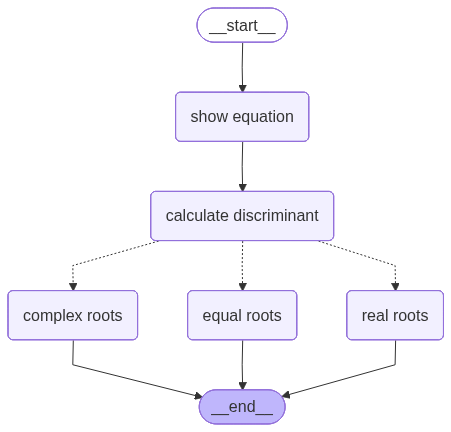

In [31]:
graph = StateGraph(QuadraticInput) 

# add nodes 
graph.add_node("show equation", show_eqn) 
graph.add_node("calculate discriminant", calc_disc) 
graph.add_node("real roots", real_roots) 
graph.add_node("equal roots", equal_roots) 
graph.add_node("complex roots", complex_roots)

# add edges 
graph.add_edge(START, "show equation")
graph.add_edge("show equation", "calculate discriminant")

graph.add_conditional_edges("calculate discriminant", check_condition)

graph.add_edge("real roots", END)
graph.add_edge("equal roots", END)
graph.add_edge("complex roots", END)

workflow = graph.compile() 
workflow

In [32]:
input_data = {
    "a": 1,
    "b": -3,
    "c": 2
} 
output = workflow.invoke(input_data)

In [33]:
output

{'a': 1,
 'b': -3,
 'c': 2,
 'equation': 'The quadratic equation is: 1x^2 + -3x + 2 = 0',
 'd': 1,
 'result': 'The roots are real and different: 2.0 and 1.0'}